In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Cross-validation scores: [0.83333333 0.9        0.9        0.86666667 1.        ]
Mean cross-validation score: 0.9


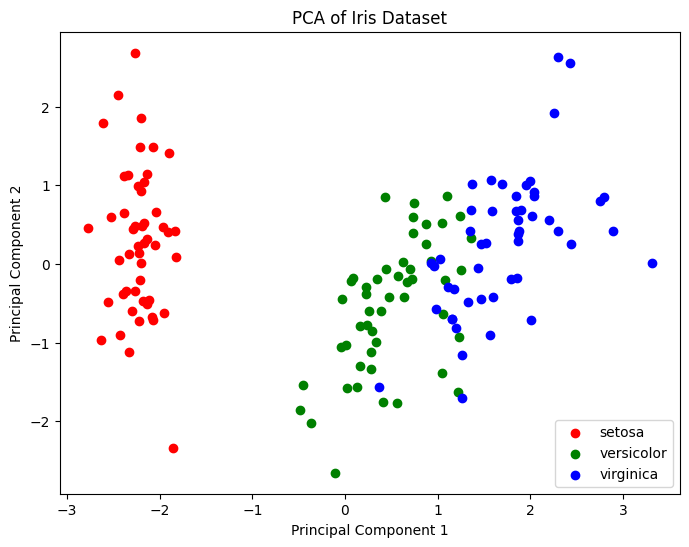

In [2]:
# 2. 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 标准化

# 3. PCA 降维
pca = PCA(n_components=2)  # 降维到2维
X_pca = pca.fit_transform(X_scaled)

# 4. 训练 KNN 模型
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 5. 评估模型
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) # 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 交叉验证评估
cv_scores = cross_val_score(knn, X_pca, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# 可视化 PCA 结果
plt.figure(figsize=(8, 6))
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=color, label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 进行 PCA 分析
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 获取主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)



Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


In [3]:
# 计算累积方差解释比例
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)


Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]


In [4]:
# 获取特征向量
components = pca.components_
print("Components:\n", components)


Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [ ]:
# 绘制方差解释比例图
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 特征重要性分析
for i, feature in enumerate(feature_names):
    print(f"Feature importance for {feature} in each principal component:")
    for j, comp in enumerate(components):
        print(f"PC{j+1}: {comp[i]:.3f}")
    print()